In [262]:
import numpy as np
import pandas as pd
from collections import defaultdict
from sklearn.neighbors import DistanceMetric
from math import radians

# Junho


 Faltam os dias 3, 4, 5, 6, 12, 19, 26, 27

In [263]:
junho = pd.read_csv('/Users/guilistocco/Documents/TCC 2 - Ônibus/BancoDados/Dados brutos/passengers_junho.csv',
                    index_col= 'Unnamed: 0')

    #  Sao 214k linhas

In [264]:
junho

,device_id,timestampI,timestampF,MAC,RSSI,channel,latitudeI,longitudeI,latitudeF,longitudeF,cnt_pckg,id,duration
0,617.0,1622529842,1622529920,40:06:a0:5b:8c:b2,-45,11,-22.827145,-47.061214,-22.829490,-47.060281,40,0,78
1,617.0,1622529842,1622529920,0c:ef:af:d3:00:36,-65,11,-22.827145,-47.061214,-22.829490,-47.060281,15,1,78
2,617.0,1622529847,1622529875,24:fd:0d:bd:91:49,-67,6,-22.826890,-47.061367,-22.826994,-47.061368,3,2,28
3,617.0,1622529850,1622529850,0e:ec:8d:d0:6d:0d,-90,7,-22.826730,-47.061454,-22.826730,-47.061454,2,3,0
4,617.0,1622529856,1622529856,0a:cc:27:40:31:3c,-87,4,-22.826406,-47.061626,-22.826406,-47.061626,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214541,NaN,1625079190,1625079190,22:ae:9f:77:09:55,-85,1,-22.816560,-47.072811,-22.816560,-47.072811,1,524,0
214542,NaN,1625079193,1625079196,50:92:b9:3b:a7:2a,-91,11,-22.816561,-47.072812,-22.816566,-47.072808,3,525,3
214543,NaN,1625079121,1625079121,ae:30:5e:57:df:56,-88,6,-22.816467,-47.072852,-22.816467,-47.072852,1,512,0
214544,NaN,1625079196,1625079196,28:16:7f:bc:c4:42,-93,6,-22.816566,-47.072808,-22.816566,-47.072808,1,526,0



## Preparacao dos dados

In [265]:
junho.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214546 entries, 0 to 214545
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   device_id   106336 non-null  float64
 1   timestampI  214546 non-null  int64  
 2   timestampF  214546 non-null  int64  
 3   MAC         214546 non-null  object 
 4   RSSI        214546 non-null  int64  
 5   channel     214546 non-null  int64  
 6   latitudeI   214546 non-null  float64
 7   longitudeI  214546 non-null  float64
 8   latitudeF   214546 non-null  float64
 9   longitudeF  214546 non-null  float64
 10  cnt_pckg    214546 non-null  int64  
 11  id          214546 non-null  int64  
 12  duration    214546 non-null  int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 22.9+ MB


In [266]:
## Tranforma timestamp em datas

junho['dataInicio'] = pd.to_datetime(junho['timestampI'], unit='s')
junho['dataFim'] = pd.to_datetime(junho['timestampF'], unit='s')

In [267]:
junho = junho[['MAC','latitudeI', 'longitudeI', 'latitudeF', 'longitudeF', 'cnt_pckg', 'duration', 'dataInicio', 'dataFim']]

In [268]:
## Cria a coluna com o dia de cada ping para os agrupamentos

junho['day'] = junho.dataInicio.dt.day

/var/folders/21/6bbwtzhx0js126xjwqnzpzzc0000gn/T/ipykernel_22166/1329112363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junho['day'] = junho.dataInicio.dt.day


In [269]:
junho.drop(index = junho[ junho.dataInicio.dt.day  !=  junho.dataFim.dt.day ].index , inplace = True)
junho.reset_index(drop = True)

/var/folders/21/6bbwtzhx0js126xjwqnzpzzc0000gn/T/ipykernel_22166/997527236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junho.drop(index = junho[ junho.dataInicio.dt.day  !=  junho.dataFim.dt.day ].index , inplace = True)


,MAC,latitudeI,longitudeI,latitudeF,longitudeF,cnt_pckg,duration,dataInicio,dataFim,day
0,40:06:a0:5b:8c:b2,-22.827145,-47.061214,-22.829490,-47.060281,40,78,2021-06-01 06:44:02,2021-06-01 06:45:20,1
1,0c:ef:af:d3:00:36,-22.827145,-47.061214,-22.829490,-47.060281,15,78,2021-06-01 06:44:02,2021-06-01 06:45:20,1
2,24:fd:0d:bd:91:49,-22.826890,-47.061367,-22.826994,-47.061368,3,28,2021-06-01 06:44:07,2021-06-01 06:44:35,1
3,0e:ec:8d:d0:6d:0d,-22.826730,-47.061454,-22.826730,-47.061454,2,0,2021-06-01 06:44:10,2021-06-01 06:44:10,1
4,0a:cc:27:40:31:3c,-22.826406,-47.061626,-22.826406,-47.061626,2,0,2021-06-01 06:44:16,2021-06-01 06:44:16,1
...,...,...,...,...,...,...,...,...,...,...
214087,22:ae:9f:77:09:55,-22.816560,-47.072811,-22.816560,-47.072811,1,0,2021-06-30 18:53:10,2021-06-30 18:53:10,30
214088,50:92:b9:3b:a7:2a,-22.816561,-47.072812,-22.816566,-47.072808,3,3,2021-06-30 18:53:13,2021-06-30 18:53:16,30
214089,ae:30:5e:57:df:56,-22.816467,-47.072852,-22.816467,-47.072852,1,0,2021-06-30 18:52:01,2021-06-30 18:52:01,30
214090,28:16:7f:bc:c4:42,-22.816566,-47.072808,-22.816566,-47.072808,1,0,2021-06-30 18:53:16,2021-06-30 18:53:16,30


In [270]:
## Cria coluna de ID para cada um dos MACS para facilitar identificacao

MACs_unicos = junho.MAC.unique()

temp = defaultdict(lambda: len(temp))
device_id = [temp[ele] for ele in MACs_unicos]

res = dict(zip(MACs_unicos, device_id))

junho['device_id'] = junho['MAC'].map(res)
junho

/var/folders/21/6bbwtzhx0js126xjwqnzpzzc0000gn/T/ipykernel_22166/48684942.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junho['device_id'] = junho['MAC'].map(res)


,MAC,latitudeI,longitudeI,latitudeF,longitudeF,cnt_pckg,duration,dataInicio,dataFim,day,device_id
0,40:06:a0:5b:8c:b2,-22.827145,-47.061214,-22.829490,-47.060281,40,78,2021-06-01 06:44:02,2021-06-01 06:45:20,1,0
1,0c:ef:af:d3:00:36,-22.827145,-47.061214,-22.829490,-47.060281,15,78,2021-06-01 06:44:02,2021-06-01 06:45:20,1,1
2,24:fd:0d:bd:91:49,-22.826890,-47.061367,-22.826994,-47.061368,3,28,2021-06-01 06:44:07,2021-06-01 06:44:35,1,2
3,0e:ec:8d:d0:6d:0d,-22.826730,-47.061454,-22.826730,-47.061454,2,0,2021-06-01 06:44:10,2021-06-01 06:44:10,1,3
4,0a:cc:27:40:31:3c,-22.826406,-47.061626,-22.826406,-47.061626,2,0,2021-06-01 06:44:16,2021-06-01 06:44:16,1,4
...,...,...,...,...,...,...,...,...,...,...,...
214541,22:ae:9f:77:09:55,-22.816560,-47.072811,-22.816560,-47.072811,1,0,2021-06-30 18:53:10,2021-06-30 18:53:10,30,75860
214542,50:92:b9:3b:a7:2a,-22.816561,-47.072812,-22.816566,-47.072808,3,3,2021-06-30 18:53:13,2021-06-30 18:53:16,30,11060
214543,ae:30:5e:57:df:56,-22.816467,-47.072852,-22.816467,-47.072852,1,0,2021-06-30 18:52:01,2021-06-30 18:52:01,30,75854
214544,28:16:7f:bc:c4:42,-22.816566,-47.072808,-22.816566,-47.072808,1,0,2021-06-30 18:53:16,2021-06-30 18:53:16,30,68270


In [271]:
## Adiciona sequence para identificar dentro de um dia de qual a o numero da conexao atual (em uma lista ordenada)

junho.sort_values(by= ['device_id', 'dataInicio'], inplace = True)

junho['sequence'] = junho.groupby(['device_id', 'day']).cumcount()+1

junho.reset_index(drop = True, inplace = True)

junho

/var/folders/21/6bbwtzhx0js126xjwqnzpzzc0000gn/T/ipykernel_22166/2411379021.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junho.sort_values(by= ['device_id', 'dataInicio'], inplace = True)
/var/folders/21/6bbwtzhx0js126xjwqnzpzzc0000gn/T/ipykernel_22166/2411379021.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junho['sequence'] = junho.groupby(['device_id', 'day']).cumcount()+1


,MAC,latitudeI,longitudeI,latitudeF,longitudeF,cnt_pckg,duration,dataInicio,dataFim,day,device_id,sequence
0,40:06:a0:5b:8c:b2,-22.827145,-47.061214,-22.829490,-47.060281,40,78,2021-06-01 06:44:02,2021-06-01 06:45:20,1,0,1
1,40:06:a0:5b:8c:b2,-22.827686,-47.060967,-22.829620,-47.060375,18,37,2021-06-01 07:11:57,2021-06-01 07:12:34,1,0,2
2,40:06:a0:5b:8c:b2,-22.829639,-47.061859,-22.829639,-47.061859,1,0,2021-06-01 07:40:30,2021-06-01 07:40:30,1,0,3
3,40:06:a0:5b:8c:b2,-22.827037,-47.061207,-22.829638,-47.060359,53,78,2021-06-01 07:58:17,2021-06-01 07:59:35,1,0,4
4,40:06:a0:5b:8c:b2,-22.827689,-47.061027,-22.829669,-47.060578,20,37,2021-06-01 08:19:51,2021-06-01 08:20:28,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
214087,fa:c2:29:96:e8:d4,-22.816555,-47.072823,-22.816555,-47.072823,1,0,2021-06-30 18:52:56,2021-06-30 18:52:56,30,75856,1
214088,38:80:df:de:83:78,-22.816558,-47.072823,-22.816554,-47.072819,13,3,2021-06-30 18:52:59,2021-06-30 18:53:02,30,75857,1
214089,b4:f7:a1:a1:ac:79,-22.816561,-47.072818,-22.816561,-47.072818,1,0,2021-06-30 18:53:06,2021-06-30 18:53:06,30,75858,1
214090,da:a1:19:97:4c:5d,-22.816560,-47.072812,-22.816560,-47.072812,2,0,2021-06-30 18:53:09,2021-06-30 18:53:09,30,75859,1


In [272]:
junho['periodo'] = None

junho.loc[junho['dataInicio'].dt.hour <= 12, 'periodo'] =  'Manha'
junho.loc[junho['dataInicio'].dt.hour > 12, 'periodo'] =  'Tarde'
junho

/var/folders/21/6bbwtzhx0js126xjwqnzpzzc0000gn/T/ipykernel_22166/2895883254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junho['periodo'] = None


,MAC,latitudeI,longitudeI,latitudeF,longitudeF,cnt_pckg,duration,dataInicio,dataFim,day,device_id,sequence,periodo
0,40:06:a0:5b:8c:b2,-22.827145,-47.061214,-22.829490,-47.060281,40,78,2021-06-01 06:44:02,2021-06-01 06:45:20,1,0,1,Manha
1,40:06:a0:5b:8c:b2,-22.827686,-47.060967,-22.829620,-47.060375,18,37,2021-06-01 07:11:57,2021-06-01 07:12:34,1,0,2,Manha
2,40:06:a0:5b:8c:b2,-22.829639,-47.061859,-22.829639,-47.061859,1,0,2021-06-01 07:40:30,2021-06-01 07:40:30,1,0,3,Manha
3,40:06:a0:5b:8c:b2,-22.827037,-47.061207,-22.829638,-47.060359,53,78,2021-06-01 07:58:17,2021-06-01 07:59:35,1,0,4,Manha
4,40:06:a0:5b:8c:b2,-22.827689,-47.061027,-22.829669,-47.060578,20,37,2021-06-01 08:19:51,2021-06-01 08:20:28,1,0,5,Manha
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214087,fa:c2:29:96:e8:d4,-22.816555,-47.072823,-22.816555,-47.072823,1,0,2021-06-30 18:52:56,2021-06-30 18:52:56,30,75856,1,Tarde
214088,38:80:df:de:83:78,-22.816558,-47.072823,-22.816554,-47.072819,13,3,2021-06-30 18:52:59,2021-06-30 18:53:02,30,75857,1,Tarde
214089,b4:f7:a1:a1:ac:79,-22.816561,-47.072818,-22.816561,-47.072818,1,0,2021-06-30 18:53:06,2021-06-30 18:53:06,30,75858,1,Tarde
214090,da:a1:19:97:4c:5d,-22.816560,-47.072812,-22.816560,-47.072812,2,0,2021-06-30 18:53:09,2021-06-30 18:53:09,30,75859,1,Tarde


In [273]:

##### OUTDATED #####

## Criando coluna de duracao da conexao entre os pings



junho['duration(s)'] = (junho['dataFim'] - junho['dataInicio']).dt.total_seconds()

/var/folders/21/6bbwtzhx0js126xjwqnzpzzc0000gn/T/ipykernel_22166/357497754.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junho['duration(s)'] = (junho['dataFim'] - junho['dataInicio']).dt.total_seconds()


In [274]:
## funcao de calculo de distancia entre o ponto de inicio e fim da conexao

def haversine_vectorize(lon1, lat1, lon2, lat2):
    # print(lon1, lat1, lon2, lat2)
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    newlon = lon2 - lon1
    newlat = lat2 - lat1

    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2

    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    m = 6_367_000 * dist #6367 for distance in KM for miles use 3958
    return m

junho['distance(m)'] = junho.apply(lambda x : haversine_vectorize(x['longitudeI'], x['latitudeI'], x['longitudeF'], x['latitudeF']) * 1.2, axis = 1)


junho

/var/folders/21/6bbwtzhx0js126xjwqnzpzzc0000gn/T/ipykernel_22166/2923288923.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junho['distance(m)'] = junho.apply(lambda x : haversine_vectorize(x['longitudeI'], x['latitudeI'], x['longitudeF'], x['latitudeF']) * 1.2, axis = 1)


,MAC,latitudeI,longitudeI,latitudeF,longitudeF,cnt_pckg,duration,dataInicio,dataFim,day,device_id,sequence,periodo,duration(s),distance(m)
0,40:06:a0:5b:8c:b2,-22.827145,-47.061214,-22.829490,-47.060281,40,78,2021-06-01 06:44:02,2021-06-01 06:45:20,1,0,1,Manha,78.0,333.068136
1,40:06:a0:5b:8c:b2,-22.827686,-47.060967,-22.829620,-47.060375,18,37,2021-06-01 07:11:57,2021-06-01 07:12:34,1,0,2,Manha,37.0,267.966298
2,40:06:a0:5b:8c:b2,-22.829639,-47.061859,-22.829639,-47.061859,1,0,2021-06-01 07:40:30,2021-06-01 07:40:30,1,0,3,Manha,0.0,0.000000
3,40:06:a0:5b:8c:b2,-22.827037,-47.061207,-22.829638,-47.060359,53,78,2021-06-01 07:58:17,2021-06-01 07:59:35,1,0,4,Manha,78.0,362.164440
4,40:06:a0:5b:8c:b2,-22.827689,-47.061027,-22.829669,-47.060578,20,37,2021-06-01 08:19:51,2021-06-01 08:20:28,1,0,5,Manha,37.0,269.738511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214087,fa:c2:29:96:e8:d4,-22.816555,-47.072823,-22.816555,-47.072823,1,0,2021-06-30 18:52:56,2021-06-30 18:52:56,30,75856,1,Tarde,0.0,0.000000
214088,38:80:df:de:83:78,-22.816558,-47.072823,-22.816554,-47.072819,13,3,2021-06-30 18:52:59,2021-06-30 18:53:02,30,75857,1,Tarde,3.0,0.725430
214089,b4:f7:a1:a1:ac:79,-22.816561,-47.072818,-22.816561,-47.072818,1,0,2021-06-30 18:53:06,2021-06-30 18:53:06,30,75858,1,Tarde,0.0,0.000000
214090,da:a1:19:97:4c:5d,-22.816560,-47.072812,-22.816560,-47.072812,2,0,2021-06-30 18:53:09,2021-06-30 18:53:09,30,75859,1,Tarde,0.0,0.000000


In [275]:
## Coluna de velocidade media para avalicao se os movimentos sao coerentes

# junho['velMed(km/h)'] = junho['distance(m)']/junho['duration(s)'] *3.6

# junho


In [276]:
# junho[['lat1', 'long1']] = junho[['latitudeF', 'longitudeF']].shift(1)

# junho['distance_lagged(m)'] = junho.apply(lambda x : haversine_vectorize(x['long1'], x['lat1'], x['longitudeI'], x['latitudeI']), axis = 1)

# junho

In [277]:
junho.loc[(junho['MAC'] == "40:06:a0:5b:8c:b2")   & (junho['day']== 1) ]

,MAC,latitudeI,longitudeI,latitudeF,longitudeF,cnt_pckg,duration,dataInicio,dataFim,day,device_id,sequence,periodo,duration(s),distance(m)
0,40:06:a0:5b:8c:b2,-22.827145,-47.061214,-22.829490,-47.060281,40,78,2021-06-01 06:44:02,2021-06-01 06:45:20,1,0,1,Manha,78.0,333.068136
1,40:06:a0:5b:8c:b2,-22.827686,-47.060967,-22.829620,-47.060375,18,37,2021-06-01 07:11:57,2021-06-01 07:12:34,1,0,2,Manha,37.0,267.966298
2,40:06:a0:5b:8c:b2,-22.829639,-47.061859,-22.829639,-47.061859,1,0,2021-06-01 07:40:30,2021-06-01 07:40:30,1,0,3,Manha,0.0,0.000000
3,40:06:a0:5b:8c:b2,-22.827037,-47.061207,-22.829638,-47.060359,53,78,2021-06-01 07:58:17,2021-06-01 07:59:35,1,0,4,Manha,78.0,362.164440
4,40:06:a0:5b:8c:b2,-22.827689,-47.061027,-22.829669,-47.060578,20,37,2021-06-01 08:19:51,2021-06-01 08:20:28,1,0,5,Manha,37.0,269.738511
5,40:06:a0:5b:8c:b2,-22.827116,-47.061166,-22.829648,-47.060414,38,78,2021-06-01 09:06:10,2021-06-01 09:07:28,1,0,6,Manha,78.0,350.063969
6,40:06:a0:5b:8c:b2,-22.827030,-47.061240,-22.829614,-47.060350,30,78,2021-06-01 11:10:03,2021-06-01 11:11:21,1,0,7,Manha,78.0,361.522224
7,40:06:a0:5b:8c:b2,-22.828242,-47.066670,-22.828242,-47.066670,1,0,2021-06-01 11:13:08,2021-06-01 11:13:08,1,0,8,Manha,0.0,0.000000
8,40:06:a0:5b:8c:b2,-22.827211,-47.061172,-22.829681,-47.060513,63,81,2021-06-01 11:57:21,2021-06-01 11:58:42,1,0,9,Manha,81.0,339.187065
9,40:06:a0:5b:8c:b2,-22.825315,-47.066428,-22.825315,-47.066428,1,0,2021-06-01 12:01:39,2021-06-01 12:01:39,1,0,10,Manha,0.0,0.000000


In [278]:
junho.loc[(junho['day']== 1) ]['MAC'].value_counts()

40:06:a0:5b:8c:b2    21
0c:ef:af:d3:00:36    17
84:18:3a:4a:d3:68    14
ec:fa:bc:1a:3a:b7    14
10:72:23:a9:1d:2f    14
                     ..
8e:69:a6:3d:dd:e0     1
d4:63:c6:d0:ef:65     1
00:0a:eb:26:11:8a     1
26:03:e0:4d:0f:34     1
90:73:5a:63:d8:14     1
Name: MAC, Length: 4637, dtype: int64

## Agrupamentio dos usuarios por dias contando numero de conexoes

Aqui pode haver mais coisas a se fazer

Como eh possivel ver no caso do dia=1 device=0
 - a data de inicio eh no dia 1, e a data fim eh no dia 2
 - isso nao acontece pra todos os devices, mas para os que acontecem pode ser retrabalhado

In [279]:
junho_group = junho.groupby(['day','device_id', 'periodo']).agg({
                                                        'dataInicio': 'min',
                                                        'dataFim':'max',
                                                        'sequence':'count',
                                                        'distance(m)':'sum'
                                                        ,'duration(s)':'sum'
})
# junho_group.loc[:,'distance(m)']  = junho_group['distance(m)'] + junho_group['distance_lagged(m)']
# junho_group.drop(labels = ['distance_lagged(m)'],inplace=True, axis = 1)

# junho_group['duration(s)'] = (junho_group['dataFim'] - junho_group['dataInicio']).dt.total_seconds()

junho_group

dataInicio             dataFim  sequence  \
day device_id periodo                                                     
1   0         Manha   2021-06-01 06:44:02 2021-06-01 12:34:31        11   
              Tarde   2021-06-01 13:11:24 2021-06-01 17:28:43        10   
    1         Manha   2021-06-01 06:44:02 2021-06-01 12:34:25         9   
              Tarde   2021-06-01 13:11:28 2021-06-01 17:05:21         8   
    2         Manha   2021-06-01 06:44:07 2021-06-01 12:33:53         6   
...                                   ...                 ...       ...   
30  75856     Tarde   2021-06-30 18:52:56 2021-06-30 18:52:56         1   
    75857     Tarde   2021-06-30 18:52:59 2021-06-30 18:53:02         1   
    75858     Tarde   2021-06-30 18:53:06 2021-06-30 18:53:06         1   
    75859     Tarde   2021-06-30 18:53:09 2021-06-30 18:53:09         1   
    75860     Tarde   2021-06-30 18:53:10 2021-06-30 18:53:10         1   

                       distance(m)  duration(s)  
day device_id periodo                            
1   0         Manha    2555.035204       1169.0  
              Tarde    3986.951935       3959.0  
    1         Manha    2372.188508       1105.0  
              Tarde    2046.926540       3183.0  
    2         Manha     390.572020        804.0  
...                            ...          ...  
30  75856     Tarde       0.000000          0.0  
    75857     Tarde       0.725430          3.0  
    75858     Tarde       0.000000          0.0  
    75859     Tarde       0.000000          0.0  
    75860     Tarde       0.000000          0.0  

[138389 rows x 5 columns]

#### Recuperando a primeira e ultima coordenada

 - Usando o usuario/MAC e o primeiro e ultimo momento em conexao
 - Buscar as coordenadas desses dispositivos nesse instante (inicial e final)
 - Comparar com a coordenada dos pontos de onibus para determinar qual o ponto de embarque do passageiro e ponto de desembarque

In [280]:


junho_coordenadas = junho_group.merge(junho[['day','device_id', 'dataInicio', 'latitudeI', 'longitudeI']],  
                                        right_on= ['day', 'device_id', 'dataInicio'], 
                                        left_on=  ['day','device_id', 'dataInicio']).merge(
                                            junho[['day','device_id', 'dataFim', 'latitudeF', 'longitudeF']],  
                                            right_on= ['day', 'device_id', 'dataFim'], 
                                            left_on=  ['day','device_id', 'dataFim'])


junho_coordenadas

,day,device_id,dataInicio,dataFim,sequence,distance(m),duration(s),latitudeI,longitudeI,latitudeF,longitudeF
0,1,0,2021-06-01 06:44:02,2021-06-01 12:34:31,11,2555.035204,1169.0,-22.827145,-47.061214,-22.829398,-47.060331
1,1,0,2021-06-01 13:11:24,2021-06-01 17:28:43,10,3986.951935,3959.0,-22.826960,-47.061293,-22.816325,-47.072641
2,1,1,2021-06-01 06:44:02,2021-06-01 12:34:25,9,2372.188508,1105.0,-22.827145,-47.061214,-22.829112,-47.060477
3,1,1,2021-06-01 13:11:28,2021-06-01 17:05:21,8,2046.926540,3183.0,-22.826777,-47.061416,-22.829708,-47.060686
4,1,2,2021-06-01 06:44:07,2021-06-01 12:33:53,6,390.572020,804.0,-22.826890,-47.061367,-22.827097,-47.061306
...,...,...,...,...,...,...,...,...,...,...,...
139200,30,75856,2021-06-30 18:52:56,2021-06-30 18:52:56,1,0.000000,0.0,-22.816555,-47.072823,-22.816555,-47.072823
139201,30,75857,2021-06-30 18:52:59,2021-06-30 18:53:02,1,0.725430,3.0,-22.816558,-47.072823,-22.816554,-47.072819
139202,30,75858,2021-06-30 18:53:06,2021-06-30 18:53:06,1,0.000000,0.0,-22.816561,-47.072818,-22.816561,-47.072818
139203,30,75859,2021-06-30 18:53:09,2021-06-30 18:53:09,1,0.000000,0.0,-22.816560,-47.072812,-22.816560,-47.072812


## Selecao de passageiros validos

#### Histograma Duration 
    - entre um minuto e uma hora de viagem
    - pelo menos 300m percorridos

Conclusao: Concentracao viagens de curta ducarao (ate 10 minutos)

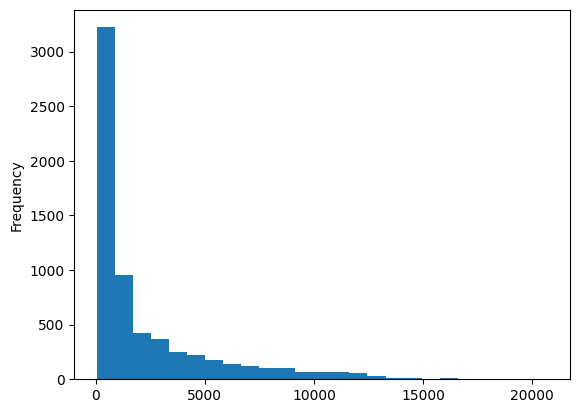

In [281]:

junho_coordenadas.loc[  ((  junho_coordenadas['duration(s)'] > 60   ) ) &
                        ((  junho_coordenadas['distance(m)'] > 300   )  ), 'duration(s)'].plot(kind='hist', bins = 25);

##### Casos para corte dos passageiros validos

- Ha casos em que a duracao conexao de um passageiro eh superior a 47000 segundos (12h)
    - isso ocorre para passageiros que usam a linha diariamente
    - assim a dataInicio ocorre no fim de um dia e a dataFim no inicio de outro
- Com isso deve-se faze rum corte para retirar essas anomalia

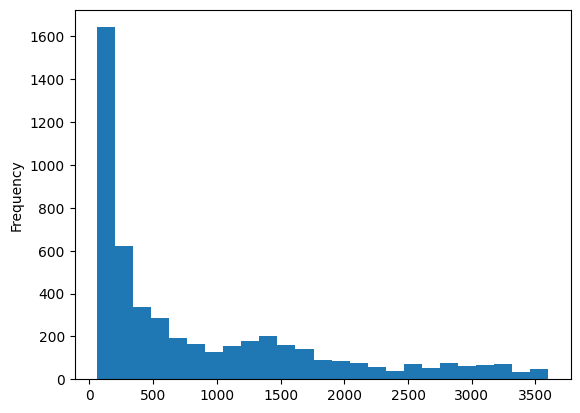

In [282]:
junho_coordenadas.loc[  ((  junho_coordenadas['duration(s)'] > 60   ) & (  junho_coordenadas['duration(s)'] < 3600   ) ) &
                        ((  junho_coordenadas['distance(m)'] > 300   )  ), 'duration(s)'].plot(kind='hist', bins = 25);

#### Histograma Distance 
    - entre um minuto e uma hora de viagem
    - pelo menos 300m percorridos

##### Conclusao: Absoluta concentracao viagens de curta ducarao (ate 10 minutos)

    - 95% percentil de viagens é de 2km
    - Sao 230 viagens com mais de 2km, razoavel retirar sujeira

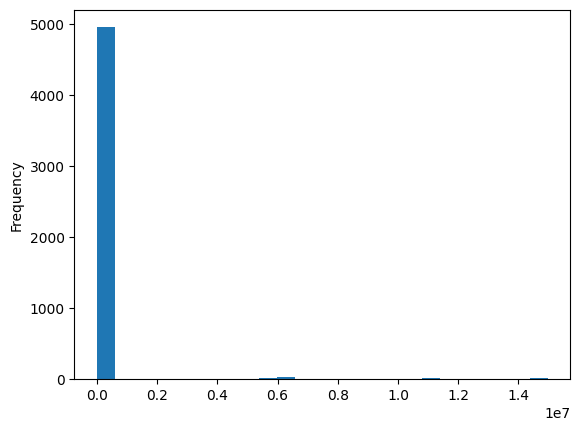

In [283]:

junho_coordenadas.loc[  ((  junho_coordenadas['duration(s)'] > 60   ) & (  junho_coordenadas['duration(s)'] < 3600   ) ) &
                        ((  junho_coordenadas['distance(m)'] > 300   )  ), 'distance(m)'].plot(kind='hist', bins = 25);

In [284]:

junho_coordenadas.loc[  ((  junho_coordenadas['duration(s)'] > 60   ) & (  junho_coordenadas['duration(s)'] < 3600   ) ) &
                        ((  junho_coordenadas['distance(m)'] > 300   )  ), 'distance(m)'].describe(percentiles=[ .25, .5, .75, .80, .85, .90, .95])
# sao 4030

count    5.049000e+03
mean     1.577321e+05
std      1.248878e+06
min      3.001354e+02
25%      4.351360e+02
50%      6.202075e+02
75%      9.857510e+02
80%      1.113287e+03
85%      1.300795e+03
90%      1.575693e+03
95%      2.105086e+03
max      1.497899e+07
Name: distance(m), dtype: float64

In [285]:

junho_coordenadas.loc[  ((  junho_coordenadas['duration(s)'] > 60   ) & (  junho_coordenadas['duration(s)'] < 3600   ) ) &
                        ((  junho_coordenadas['distance(m)'] > 2000   )  ) ]

,day,device_id,dataInicio,dataFim,sequence,distance(m),duration(s),latitudeI,longitudeI,latitudeF,longitudeF
0,1,0,2021-06-01 06:44:02,2021-06-01 12:34:31,11,2.555035e+03,1169.0,-22.827145,-47.061214,-22.829398,-47.060331
2,1,1,2021-06-01 06:44:02,2021-06-01 12:34:25,9,2.372189e+03,1105.0,-22.827145,-47.061214,-22.829112,-47.060477
3,1,1,2021-06-01 13:11:28,2021-06-01 17:05:21,8,2.046927e+03,3183.0,-22.826777,-47.061416,-22.829708,-47.060686
25,1,14,2021-06-01 13:07:53,2021-06-01 18:10:06,8,2.734360e+03,2607.0,-22.813319,-47.065397,-22.813783,-47.070272
63,1,39,2021-06-01 07:30:44,2021-06-01 11:33:27,2,1.488892e+07,1736.0,-22.816326,-47.072648,-22.815417,-47.072656
...,...,...,...,...,...,...,...,...,...,...,...
136392,30,10804,2021-06-30 07:35:25,2021-06-30 12:57:49,5,6.087544e+06,1570.0,-22.824826,-47.065397,-22.824955,-47.065593
136816,30,28281,2021-06-30 14:28:15,2021-06-30 16:27:28,2,2.269308e+03,789.0,-22.816346,-47.072649,-22.821261,-47.067696
136950,30,43508,2021-06-30 18:24:26,2021-06-30 18:29:19,1,5.848912e+06,293.0,-22.816328,0.733333,-22.816363,-47.072633
137048,30,58140,2021-06-30 12:55:03,2021-06-30 13:06:29,1,2.248109e+03,686.0,-22.829531,-47.064248,-22.812716,-47.065564


In [286]:

junho_coordenadas.loc[  ((  junho_coordenadas['duration(s)'] > 60   ) & (  junho_coordenadas['duration(s)'] < 3600   ) ) &
                        ((  junho_coordenadas['distance(m)'] > 2000   )  ), 'distance(m)'].describe(percentiles=[ .25, .5, .75, .80, .85, .90, .95])
# sao 4030

count    2.920000e+02
mean     2.715718e+06
std      4.481892e+06
min      2.000923e+03
25%      2.230927e+03
50%      2.675883e+03
75%      5.914997e+06
80%      6.087157e+06
85%      6.911778e+06
90%      1.131972e+07
95%      1.132650e+07
max      1.497899e+07
Name: distance(m), dtype: float64

### Passageiros Validos

Foi adotado a duracao das viagens entre 60s e 1h

e com distancia percorrida entre 300m e 2,125km



In [287]:
validas_junho = junho_coordenadas.loc[  ((  junho_coordenadas['duration(s)'] > 60   ) & (  junho_coordenadas['duration(s)'] < 3600   ) ) &
                        ((  junho_coordenadas['distance(m)'] > 300  ) & (  junho_coordenadas['distance(m)'] < 2125   )  )]
validas_junho

,day,device_id,dataInicio,dataFim,sequence,distance(m),duration(s),latitudeI,longitudeI,latitudeF,longitudeF
3,1,1,2021-06-01 13:11:28,2021-06-01 17:05:21,8,2046.926540,3183.0,-22.826777,-47.061416,-22.829708,-47.060686
4,1,2,2021-06-01 06:44:07,2021-06-01 12:33:53,6,390.572020,804.0,-22.826890,-47.061367,-22.827097,-47.061306
11,1,7,2021-06-01 06:44:48,2021-06-01 12:34:20,7,1171.826118,787.0,-22.827616,-47.061038,-22.828888,-47.060592
12,1,7,2021-06-01 13:11:22,2021-06-01 16:43:41,6,1165.803784,193.0,-22.827083,-47.061219,-22.828920,-47.060559
14,1,8,2021-06-01 13:04:16,2021-06-01 19:10:52,7,483.412306,359.0,-22.813787,-47.060110,-22.831784,-47.062191
...,...,...,...,...,...,...,...,...,...,...,...
138601,30,75263,2021-06-30 16:15:30,2021-06-30 16:40:28,1,980.348365,1498.0,-22.821159,-47.067949,-22.815148,-47.072541
138637,30,75299,2021-06-30 16:21:45,2021-06-30 16:26:48,1,1263.711180,303.0,-22.829544,-47.062912,-22.822227,-47.069446
138667,30,75329,2021-06-30 16:24:24,2021-06-30 16:26:33,1,521.594598,129.0,-22.825440,-47.065998,-22.822692,-47.069018
138959,30,75621,2021-06-30 17:53:38,2021-06-30 17:54:56,1,327.969797,78.0,-22.830359,-47.064600,-22.831526,-47.062251


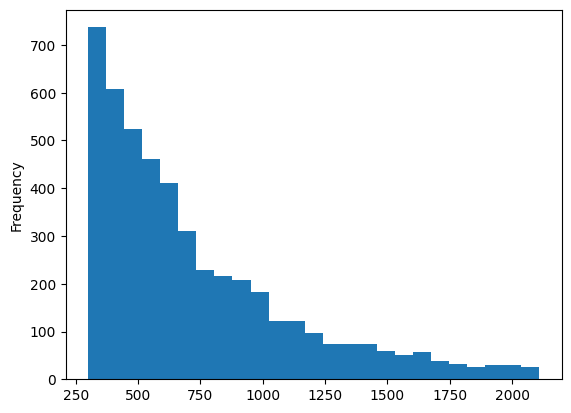

In [288]:
validas_junho['distance(m)'].plot(kind='hist', bins = 25);

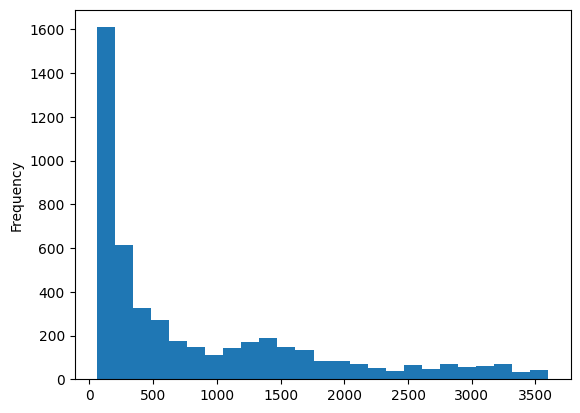

In [289]:
validas_junho['duration(s)'].plot(kind='hist', bins = 25);

In [290]:
validas_junho.to_excel('viagens_validas_junho.xlsx', engine = 'openpyxl')

In [291]:
validas_junho.loc[((validas_junho['dataFim'] - validas_junho['dataInicio']).dt.total_seconds()  < validas_junho['duration(s)'])]

,day,device_id,dataInicio,dataFim,sequence,distance(m),duration(s),latitudeI,longitudeI,latitudeF,longitudeF
341,1,219,2021-06-01 16:55:52,2021-06-01 17:03:53,2,1663.685557,485.0,-22.819901,-47.067734,-22.831503,-47.063166
1986,1,1436,2021-06-01 16:54:46,2021-06-01 16:56:54,2,622.427555,144.0,-22.817006,-47.066171,-22.821014,-47.067003
1987,1,1436,2021-06-01 16:54:46,2021-06-01 16:56:54,2,622.427555,144.0,-22.817006,-47.066171,-22.821014,-47.067993
4026,1,3377,2021-06-01 16:55:57,2021-06-01 17:07:13,2,363.667171,704.0,-22.820093,-47.068095,-22.821291,-47.067707
4132,1,3471,2021-06-01 17:02:20,2021-06-01 17:03:42,2,833.461362,85.0,-22.825866,-47.067298,-22.831111,-47.063831
...,...,...,...,...,...,...,...,...,...,...,...
114480,24,1619,2021-06-24 11:10:32,2021-06-24 11:18:30,2,323.119766,514.0,-22.824653,-47.065070,-22.825326,-47.066509
115713,24,6975,2021-06-24 12:35:21,2021-06-24 12:58:08,2,324.157657,1421.0,-22.826055,-47.067018,-22.824980,-47.065703
117232,24,40153,2021-06-24 11:04:12,2021-06-24 11:22:43,2,1993.838342,1245.0,-22.816355,-47.072655,-22.814148,-47.064433
117233,24,40153,2021-06-24 11:04:12,2021-06-24 11:22:43,2,1993.838342,1245.0,-22.816355,-47.072655,-22.813680,-47.064938


junho

junho.drop(axis = 1, labels= ['ID_VIAGEM'], inplace = True)

validas_junho['ID_VIAGEM'] = validas_junho['device_id'].astype('str') + '_' +  validas_junho['dataInicio'].dt.day.astype('str') + '_' + validas_junho['dataInicio'].dt.month.astype('str')
validas_junho['ID_VIAGEM'] 

validas_junho

- com o agrupado temos os pontos de onibus de chegada e saida
- 
- 

## validas_junho

In [292]:
validas_junho.groupby(pd.Grouper(key='dataInicio', freq='1h')).agg(   {
                                                                          'sequence':'count'
}    )#.plot(kind='bar');

,sequence
dataInicio,
2021-06-01 06:00:00,2
2021-06-01 07:00:00,37
2021-06-01 08:00:00,0
2021-06-01 09:00:00,12
2021-06-01 10:00:00,0
...,...
2021-06-30 14:00:00,5
2021-06-30 15:00:00,0
2021-06-30 16:00:00,11


## Continuacao

- com os pontos de chegada e saida das viagens validas 
- agrupar os pontos por intervalo de tempo (aqui vai ficar a parametrizacao)
- dai para cara intervalo horario vamos ter uma tabela esparsa de origem destino

    
    - para intervalo de 1h (6h as 18h)
        - para um dia sao 12 matrizes OD
        - para um mes sao 360 matrizes OD



    
    - para o intervalo de 2h (6h as 18h)
        - para um dia sao 6 matrizes OD
        - para um mes sao 180 matrizes OD



    
    - para intervalo de 30min (6h as 18h)
        - para um dia sao 24 matrizes OD
        - para um mes sao 720 matrizes OD


# Analises diversas

In [293]:
junho

,MAC,latitudeI,longitudeI,latitudeF,longitudeF,cnt_pckg,duration,dataInicio,dataFim,day,device_id,sequence,periodo,duration(s),distance(m)
0,40:06:a0:5b:8c:b2,-22.827145,-47.061214,-22.829490,-47.060281,40,78,2021-06-01 06:44:02,2021-06-01 06:45:20,1,0,1,Manha,78.0,333.068136
1,40:06:a0:5b:8c:b2,-22.827686,-47.060967,-22.829620,-47.060375,18,37,2021-06-01 07:11:57,2021-06-01 07:12:34,1,0,2,Manha,37.0,267.966298
2,40:06:a0:5b:8c:b2,-22.829639,-47.061859,-22.829639,-47.061859,1,0,2021-06-01 07:40:30,2021-06-01 07:40:30,1,0,3,Manha,0.0,0.000000
3,40:06:a0:5b:8c:b2,-22.827037,-47.061207,-22.829638,-47.060359,53,78,2021-06-01 07:58:17,2021-06-01 07:59:35,1,0,4,Manha,78.0,362.164440
4,40:06:a0:5b:8c:b2,-22.827689,-47.061027,-22.829669,-47.060578,20,37,2021-06-01 08:19:51,2021-06-01 08:20:28,1,0,5,Manha,37.0,269.738511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214087,fa:c2:29:96:e8:d4,-22.816555,-47.072823,-22.816555,-47.072823,1,0,2021-06-30 18:52:56,2021-06-30 18:52:56,30,75856,1,Tarde,0.0,0.000000
214088,38:80:df:de:83:78,-22.816558,-47.072823,-22.816554,-47.072819,13,3,2021-06-30 18:52:59,2021-06-30 18:53:02,30,75857,1,Tarde,3.0,0.725430
214089,b4:f7:a1:a1:ac:79,-22.816561,-47.072818,-22.816561,-47.072818,1,0,2021-06-30 18:53:06,2021-06-30 18:53:06,30,75858,1,Tarde,0.0,0.000000
214090,da:a1:19:97:4c:5d,-22.816560,-47.072812,-22.816560,-47.072812,2,0,2021-06-30 18:53:09,2021-06-30 18:53:09,30,75859,1,Tarde,0.0,0.000000


In [294]:
junho.loc[(junho['device_id'] == 6)   & (junho['day'] == 1) ]

,MAC,latitudeI,longitudeI,latitudeF,longitudeF,cnt_pckg,duration,dataInicio,dataFim,day,device_id,sequence,periodo,duration(s),distance(m)
598,8c:e5:c0:af:1e:a0,-22.827503,-47.061097,-22.827735,-47.060975,50,4,2021-06-01 06:44:46,2021-06-01 06:44:50,1,6,1,Manha,4.0,34.379456
599,8c:e5:c0:af:1e:a0,-22.816354,-47.072731,-22.816331,-47.072650,15,69,2021-06-01 18:59:59,2021-06-01 19:01:08,1,6,2,Tarde,69.0,10.417888


In [295]:
junho_group.reset_index(inplace=True)
junho_group.loc[(junho_group['device_id'] == 2)   & (junho_group['day'] == 1) ]

,day,device_id,periodo,dataInicio,dataFim,sequence,distance(m),duration(s)
4,1,2,Manha,2021-06-01 06:44:07,2021-06-01 12:33:53,6,390.572020,804.0
5,1,2,Tarde,2021-06-01 13:11:25,2021-06-01 16:43:12,5,210.957447,256.0


In [296]:
junho.loc[ (junho['day'] == 1) , 'device_id'].value_counts().describe(percentiles=[ .25, .5, .75, .80, .85, .90, .95])

count    4637.000000
mean        1.699159
std         1.998561
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
80%         2.000000
85%         2.000000
90%         3.000000
95%         6.000000
max        21.000000
Name: device_id, dtype: float64

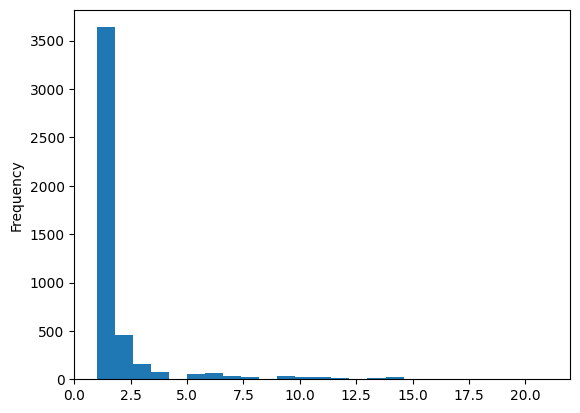

In [297]:
### para um dia
junho.loc[ (junho['day'] == 1) , 'device_id'].value_counts().plot(kind='hist', bins = 25);
